# Deep Learning and Transfer Learning with pre-trained models of CIFAR10 dataset

This notebook uses a pretrained model to build a classifier (CNN)

# Import necessary dependencies

In [0]:
import keras
from keras import applications
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

import matplotlib.pyplot as plt

import numpy as np

# Parameters

In [0]:
batch_size = 128
n_classes = 10
epochs = 50

# Load the pre-trained model

In [0]:
vgg_model = applications.VGG19(include_top=False)

## Model's architecture

In [6]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

# Load the dataset

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## One hot encode the labels

In [0]:
y_train = keras.utils.to_categorical(y_train,num_classes=n_classes)
y_test = keras.utils.to_categorical(y_test,num_classes=n_classes)

# Inputs for FC layers

In [9]:
bottleneck_features_train = vgg_model.predict(X_train,verbose=1)
bottleneck_features_test = vgg_model.predict(X_test,verbose=1)

10000/10000 [==============================] - 7s 663us/step


In [10]:
bottleneck_features_train.shape

(50000, 1, 1, 512)

## Custom Classifier

In [0]:
clf_model = Sequential()
clf_model.add(Flatten(input_shape=bottleneck_features_train.shape[1:]))
clf_model.add(Dense(512, activation='relu'))
clf_model.add(Dropout(0.5))
clf_model.add(Dense(256, activation='relu'))
clf_model.add(Dropout(0.5))
clf_model.add(Dense(n_classes, activation='softmax'))

## Visualize the network architecture

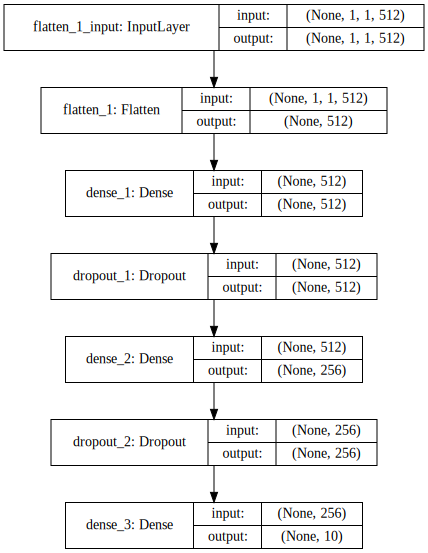

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(clf_model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

##  Compile the model

In [0]:
clf_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## Train the classifier

In [14]:
clf_model.fit(bottleneck_features_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/50
50000/50000 [==============================] - 3s 68us/step - loss: 4.9752 - acc: 0.2879
Epoch 2/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.8199 - acc: 0.3738
Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6324 - acc: 0.4410
Epoch 4/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5309 - acc: 0.4775
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4692 - acc: 0.4972
Epoch 6/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.4215 - acc: 0.5197
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.3798 - acc: 0.5337
Epoch 8/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.3498 - acc: 0.5483
Epoch 9/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.3171 - acc: 0.5563
Epoch 10/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.2978 - acc: 0.5675

## Predict and test model performance

In [24]:
score = clf_model.evaluate(bottleneck_features_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 79us/step


In [25]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.357849464416504
Test accuracy: 0.6318


# Assign label to a test image

In [0]:
def predict_label(img_idx,show_proba=True):
    plt.imshow(X_test[img_idx],aspect='auto')
    plt.title("Image to be Labeled")
    plt.show()
    
    print("Actual Class:{}".format(np.nonzero(y_test[img_idx])[0][0]))
    
    test_image =np.expand_dims(X_test[img_idx], axis=0)
    bf = vgg_model.predict(test_image,verbose=0)
    pred_label = clf_model.predict_classes(bf,batch_size=1,verbose=0)
    
    print("Predicted Class:{}".format(pred_label[0]))
    if show_proba:
        print("Predicted Probabilities")
        print(clf_model.predict_proba(bf))

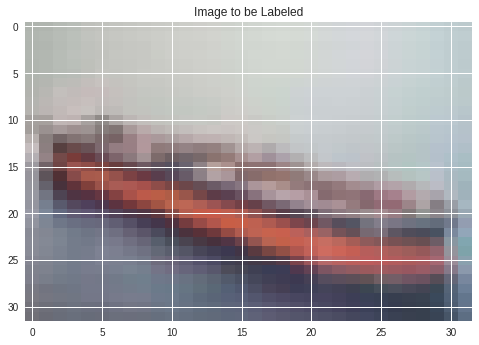

Actual Class:8
Predicted Class:8
Predicted Probabilities
[[4.6128607e-03 2.4777209e-02 2.3347949e-12 2.5561111e-08 3.3493930e-12
  4.2109911e-14 4.9479413e-15 4.5944134e-14 8.8894284e-01 8.1667036e-02]]


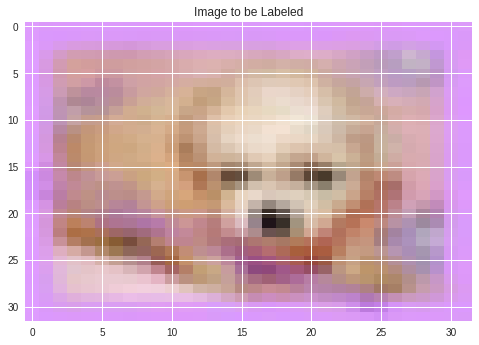

Actual Class:5
Predicted Class:5
Predicted Probabilities
[[1.4527365e-15 2.6628708e-10 9.8462918e-09 3.8319483e-01 1.1531362e-13
  6.1676973e-01 3.5407767e-05 3.3473573e-12 1.4404810e-14 8.1141122e-11]]


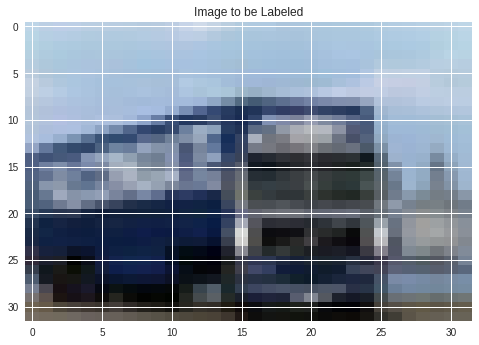

Actual Class:9
Predicted Class:9
Predicted Probabilities
[[2.1847149e-02 4.0433072e-02 9.1657901e-05 7.2440812e-03 1.2047797e-03
  5.9194624e-04 7.8616240e-06 2.5597878e-03 1.0707120e-02 9.1531253e-01]]


In [23]:
for img_idx in [999,1999,3999]:
    predict_label(img_idx)